In [27]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Idee generali:
- fare dei grafici su tutto lo storico, per mostrare la variazione di una valuta rispetto all'euro
- creare delle conversioni, quinid qunato vale la valuta x riseptto all'euro
- fare dei grafici su un intervallo ridotto
- applciare un modellino di machine learning previsionale (serie storiche) che prevedere il valore della moneta. Aggiungere un controllo del valore catturato il giorno x rispetto a quello stimato (Provare sia i modelli ARIMA - Prophet)


# Functions

In [28]:
def create_dataframe(table_name: str) -> pd.DataFrame: 
    db_path_notebook = os.path.join('data', 'currency.db')
    #db_path_py = os.path.join(os.path.dirname(__file__), 'data', 'currency.db')
    conn = sqlite3.connect(db_path_notebook)
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df



def create_dataframe_by_corresponding_currency(df: pd.DataFrame, currencies: list) -> dict[pd.DataFrame]:
    """ Crea dizionario con dataframe divisi per currency"""
    dict_dataframe_by_curr = {}
    for corresponding_currency in currencies:
        df_specific_currency = df[df['corresponding_currency'] == corresponding_currency]
        dict_dataframe_by_curr[corresponding_currency] = df_specific_currency
    return dict_dataframe_by_curr



def show_temporal_rates_from_specific_dataframe(df: pd.DataFrame) -> None:
    """Stampa grafico singolo dataframe di uno specifico tasso"""
    plt.figure(figsize=(10, 5))
    #plt.plot(df.index, df['corresponding_currency_value'], color='blue', linewidth=2)
    sns.lineplot(x=df.index, y=df['corresponding_currency_value'], color='green', linewidth=1)
    plt.title("Andamento del Tasso di Cambio nel Tempo")
    plt.xlabel("Data")
    plt.ylabel(f"Tasso di Cambio EUR/{df['corresponding_currency'].unique()[0]}")
    plt.grid(True)  # Aggiungiamo una griglia per maggiore leggibilità
    # Intervallo di 2 anni per le etichette sull'asse X
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))   # Ogni 2 anni
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Mostra solo l'anno
    # Rotazione delle date per maggiore leggibilità
    plt.xticks(rotation=45)
    plt.show()


# def show_temporal_rates_from_all_daraframes(all_rates_df: dict[pd.DataFrame]) -> None:
#     """Stampa grafico per ogni dataframe contenuto del """
#     for corresponding_currency in all_rates_df.keys():
#         single_currency_dataframe = df[corresponding_currency]
#         plt.figure(figsize=(7, 4))
#         #plt.plot(df.index, df['corresponding_currency_value'], color='blue', linewidth=2)
#         sns.lineplot(x=single_currency_dataframe.index, y=single_currency_dataframe['corresponding_currency_value'], color='blue') #, linewidth = 1
#         plt.title("Andamento del Tasso di Cambio nel Tempo")
#         plt.xlabel("Data")
#         plt.ylabel(f"Tasso di Cambio EUR/{corresponding_currency}")
#         plt.grid(True)  # Aggiungiamo una griglia per maggiore leggibilità
#         plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))   # Ogni 2 anni
#         plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Mostra solo l'anno
#         # Rotazione delle date per maggiore leggibilità
#         plt.xticks(rotation=45)
#         plt.show()


def grafico_temporale_migliorato(df: pd.DataFrame):
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")  # Impostazione di uno stile moderno con griglia
    sns.lineplot(x=df.index, y=df['corresponding_currency_value'], color='green', linewidth=1)
    
    # Ombreggiatura dell'area sotto la linea per migliorare l'estetica
    plt.fill_between(df.index, df['corresponding_currency_value'], color='royalblue', alpha=0.1)
    
    # Trova i punti di minimo e massimo per annotazioni
    max_value = df['corresponding_currency_value'].max()
    min_value = df['corresponding_currency_value'].min()
    max_date = df[df['corresponding_currency_value'] == max_value].index[0]
    min_date = df[df['corresponding_currency_value'] == min_value].index[0]

    # Aggiungi annotazioni
    plt.annotate(f'Massimo: {max_value:.2f}', xy=(max_date, max_value), 
                 xytext=(max_date, max_value+0.02),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='darkred')
    plt.annotate(f'Minimo: {min_value:.2f}', xy=(min_date, min_value), 
                 xytext=(min_date, min_value-0.02),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='darkgreen')
    
    # Imposta i limiti dell'asse Y in modo che non parta da 0 ma dal valore minimo e massimo dei dati
    plt.ylim(min_value - 0.05, max_value + 0.05)  # Aggiungi un margine per visibilità


    # Titolo e etichette personalizzati
    plt.title("Andamento del Tasso di Cambio nel Tempo", fontsize=16, color='black')
    plt.xlabel("Data", fontsize=12)
    plt.ylabel(f"Tasso di Cambio EUR/{df['corresponding_currency'].unique()[0]}", fontsize=12)
    plt.xticks(rotation=45)  # Rotazione delle date per leggibilità
    plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

    #aggiunta date
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))   # Ogni 2 anni
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Mostra solo l'anno
    # Rotazione delle date per maggiore leggibilità
    plt.xticks(rotation=45)

    # Mostra il grafico
    plt.tight_layout()
    plt.show()

In [29]:
currency_list = [
    'AUD', 'BGN', 'BRL', 'CAD', 'CHF', 'CNY', 'CZK', 'DKK', 'GBP', 'HKD',
    'HUF', 'IDR', 'ILS', 'INR', 'ISK', 'JPY', 'KRW', 'MXN', 'MYR', 'NOK',
    'NZD', 'PHP', 'PLN', 'RON', 'SEK', 'SGD', 'THB', 'TRY', 'USD', 'ZAR']

In [30]:
df = create_dataframe('storic_currencies_table_official')
df

,base_currency,date,corresponding_currency,corresponding_currency_value
0,EUR,2001-12-31,AUD,1.74680
1,EUR,2001-12-31,BGN,1.95290
2,EUR,2001-12-31,CAD,1.43880
3,EUR,2001-12-31,CHF,1.48260
4,EUR,2001-12-31,CYP,0.57547
...,...,...,...,...
38056,EUR,2024-11-13,SGD,1.42140
38057,EUR,2024-11-13,THB,36.86100
38058,EUR,2024-11-13,TRY,36.52200
38059,EUR,2024-11-13,USD,1.06290


In [31]:
date_index_df = df.copy()
date_index_df['date'] = pd.to_datetime(date_index_df['date'])
date_index_df.set_index('date', inplace=True)

# Visualizza le prime righe per assicurarti che tutto sia corretto
print(date_index_df)

           base_currency corresponding_currency  corresponding_currency_value
date                                                                         
2001-12-31           EUR                    AUD                       1.74680
2001-12-31           EUR                    BGN                       1.95290
2001-12-31           EUR                    CAD                       1.43880
2001-12-31           EUR                    CHF                       1.48260
2001-12-31           EUR                    CYP                       0.57547
...                  ...                    ...                           ...
2024-11-13           EUR                    SGD                       1.42140
2024-11-13           EUR                    THB                      36.86100
2024-11-13           EUR                    TRY                      36.52200
2024-11-13           EUR                    USD                       1.06290
2024-11-13           EUR                    ZAR                 

In [32]:
all_df = create_dataframe_by_corresponding_currency(date_index_df, currency_list)

In [14]:
# for k,v in all_df.items():
#     print(k, v)

In [ ]:
print(all_df['USD'])

In [34]:
# for k, dataframe_specific in all_df.items():
#     print(f"Statistiche di base per {k}")
#     print(dataframe_specific.describe())


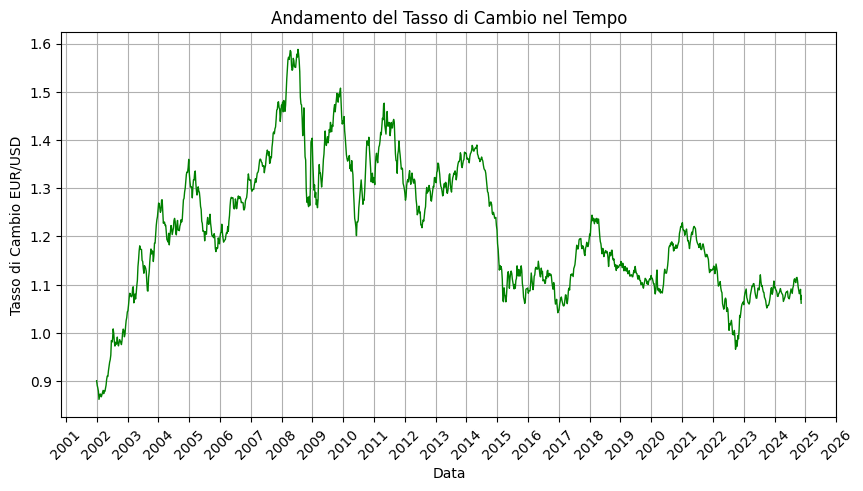

In [15]:
show_temporal_rates_from_specific_dataframe(all_df['USD'])

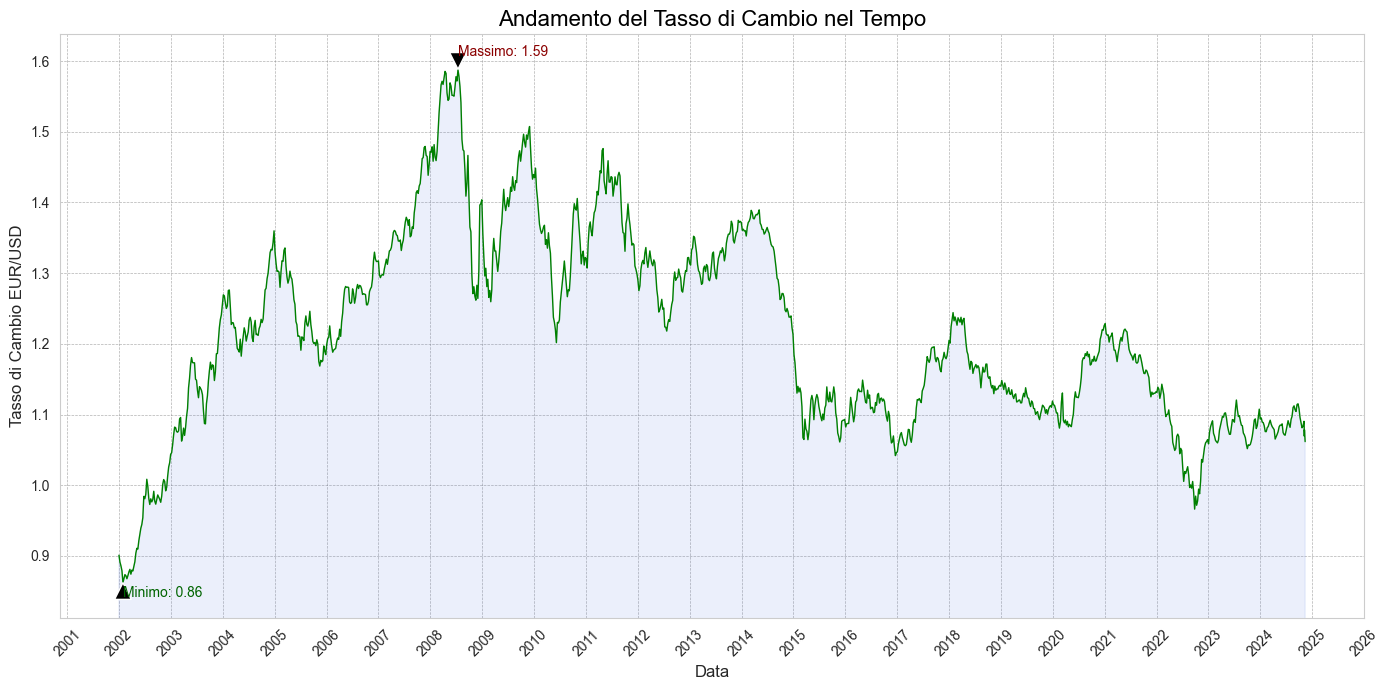

In [16]:
grafico_temporale_migliorato(all_df['USD'])

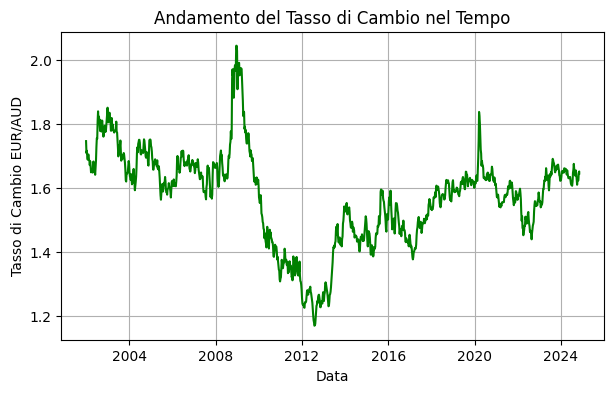

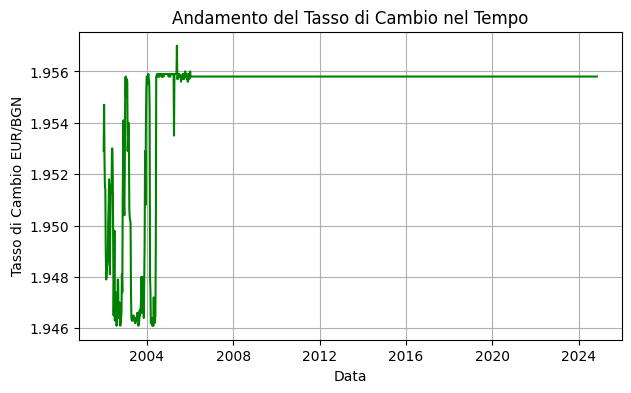

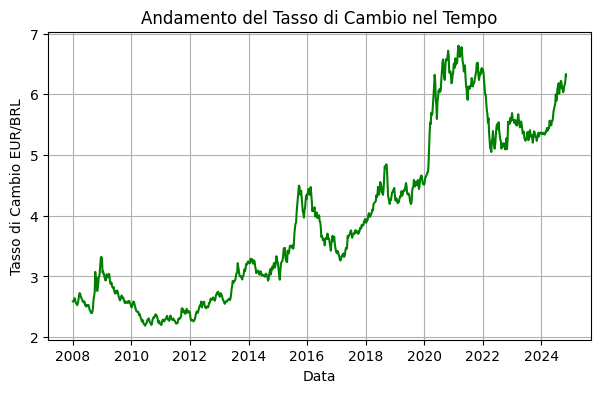

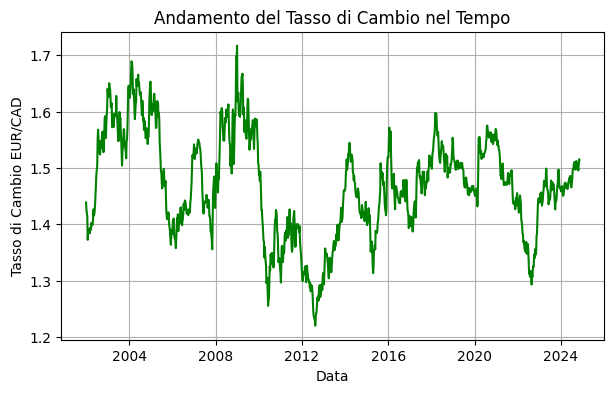

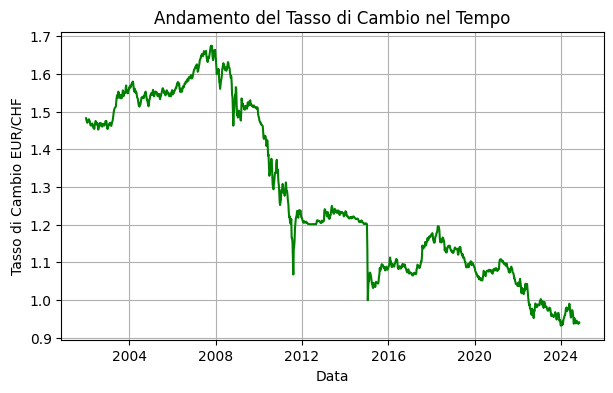

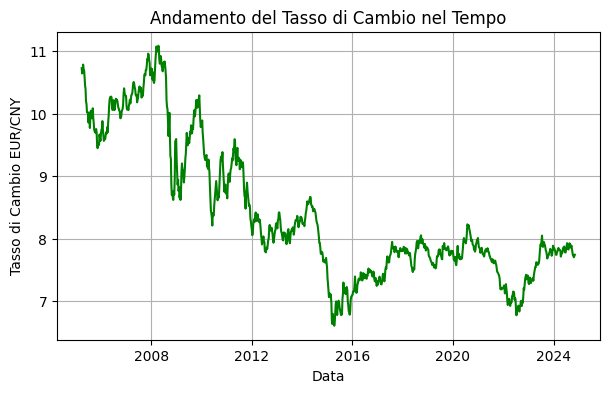

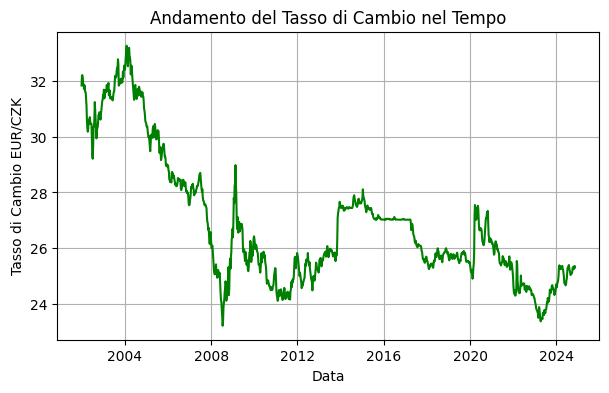

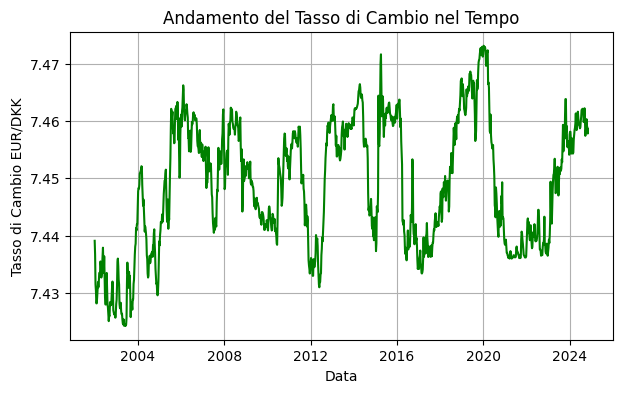

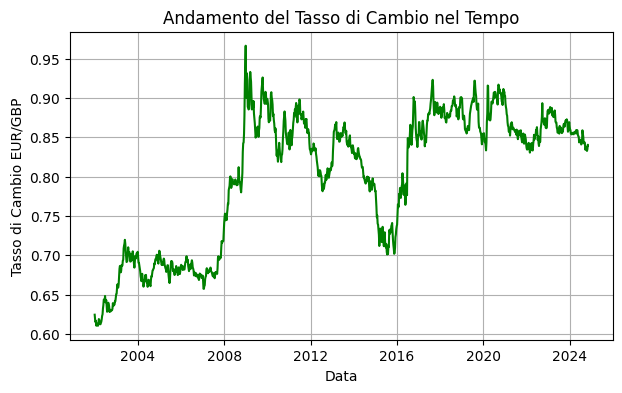

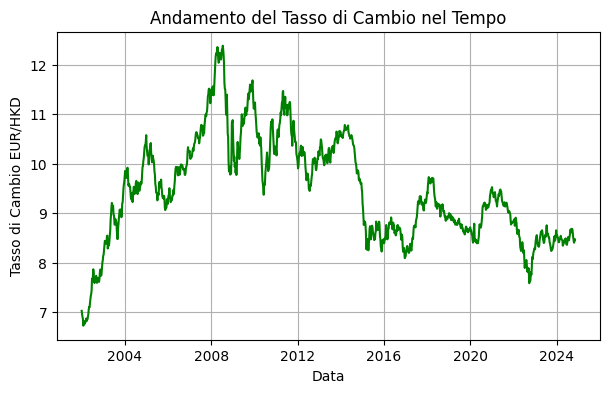

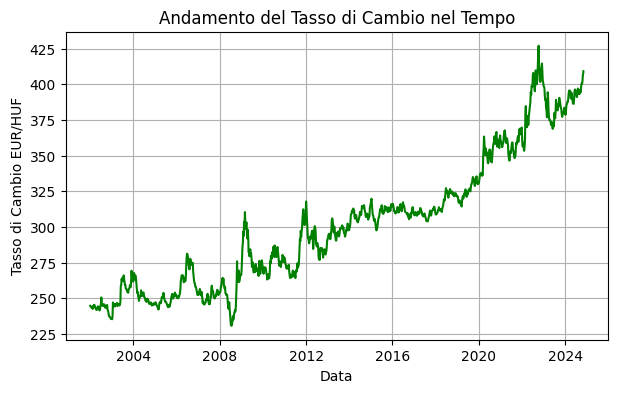

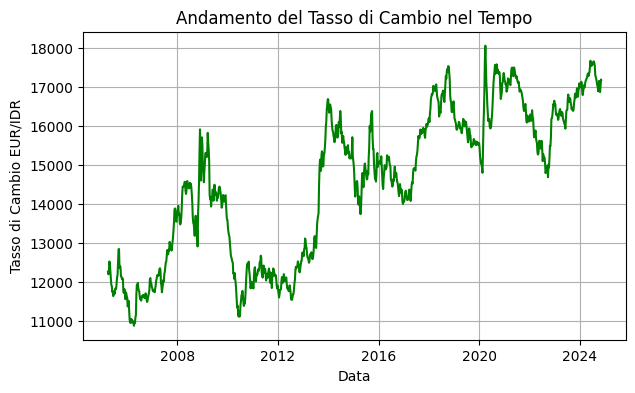

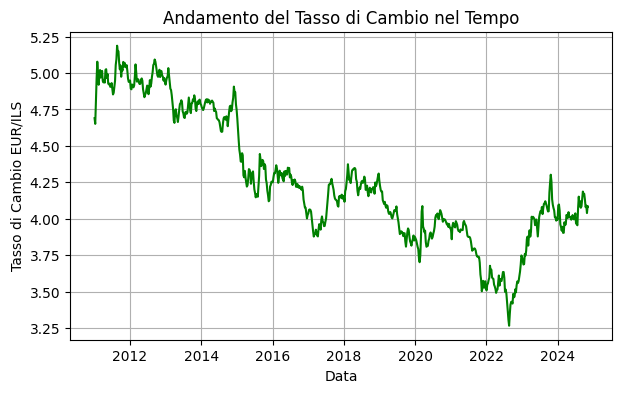

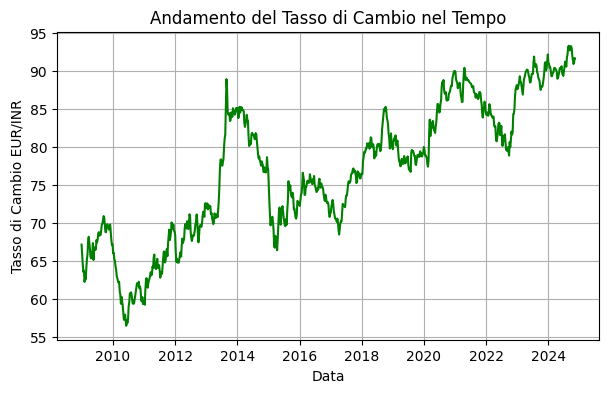

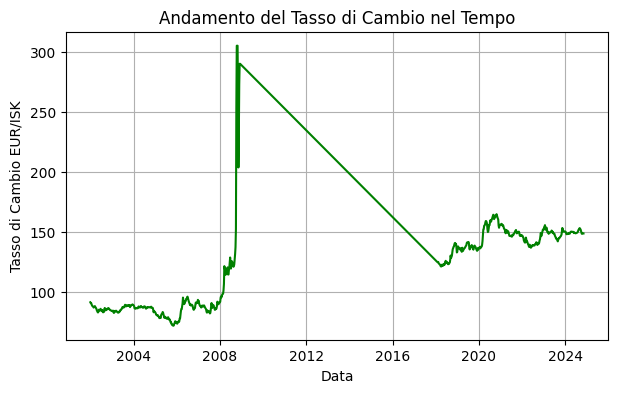

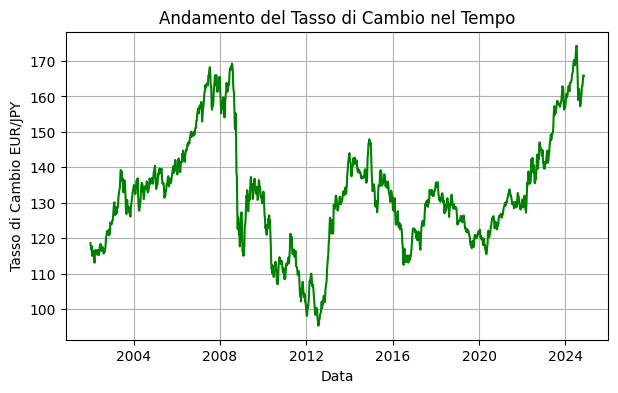

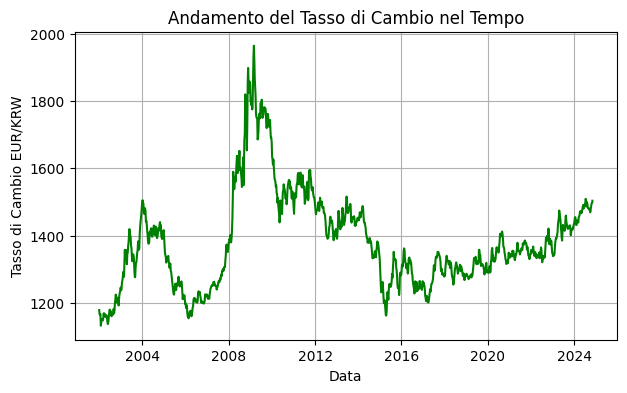

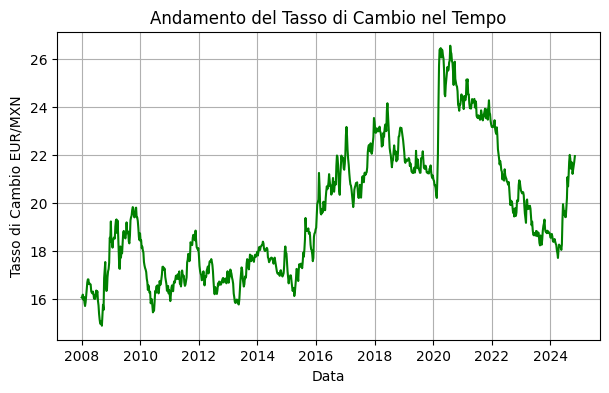

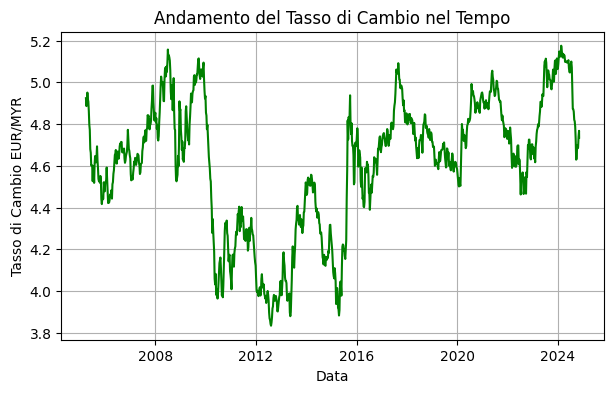

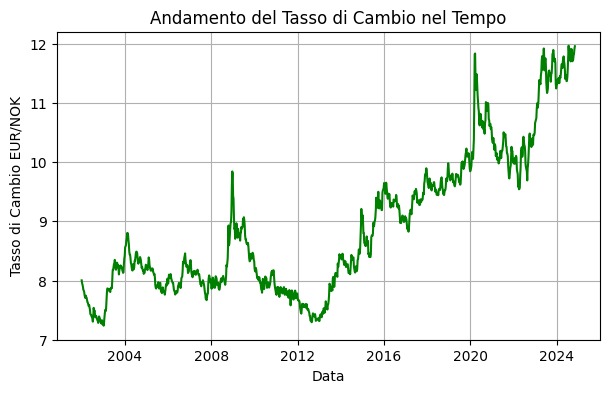

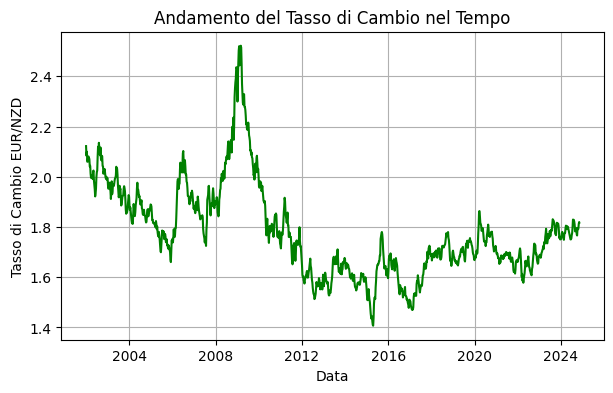

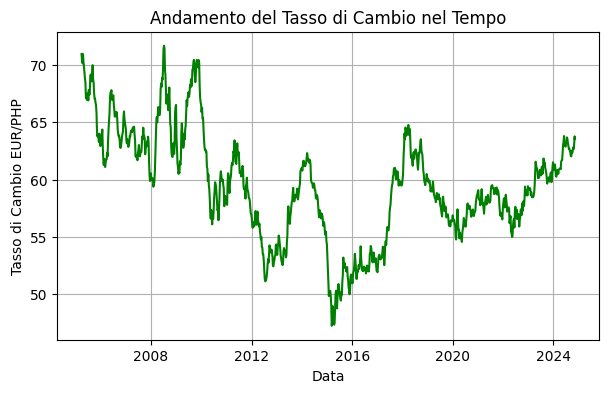

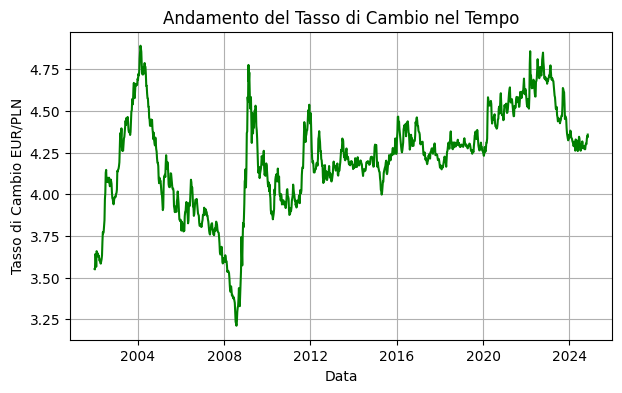

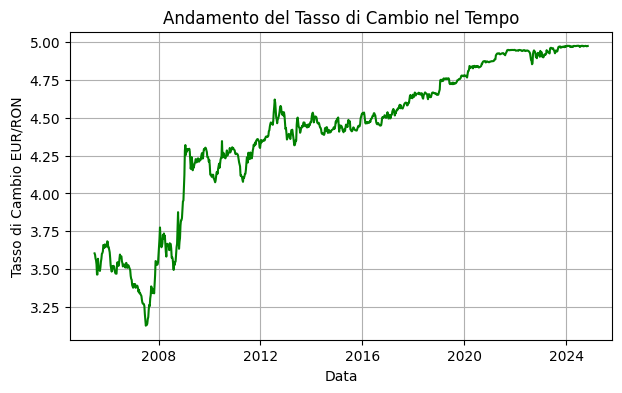

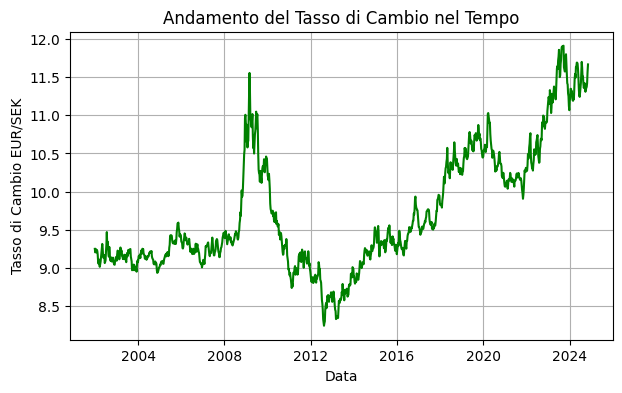

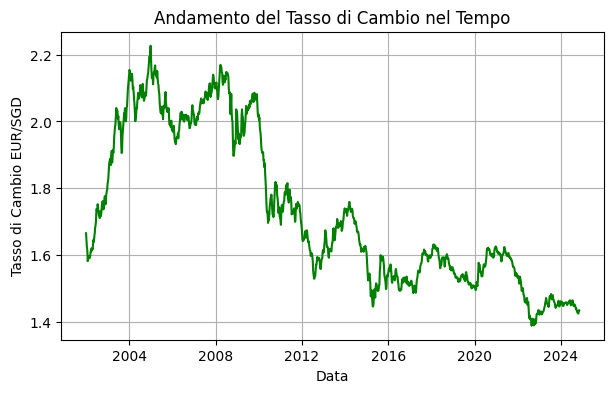

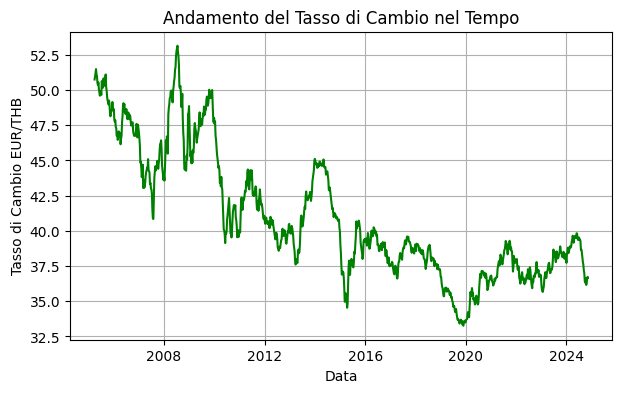

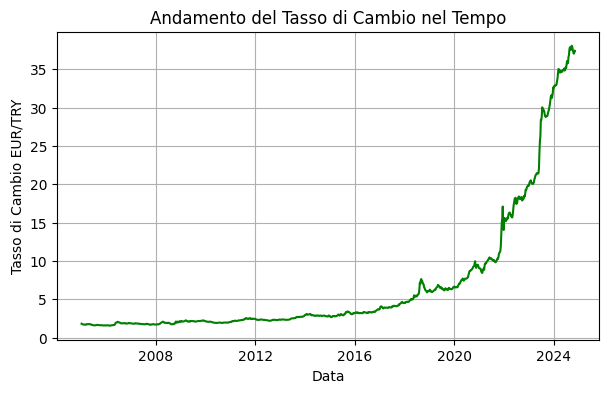

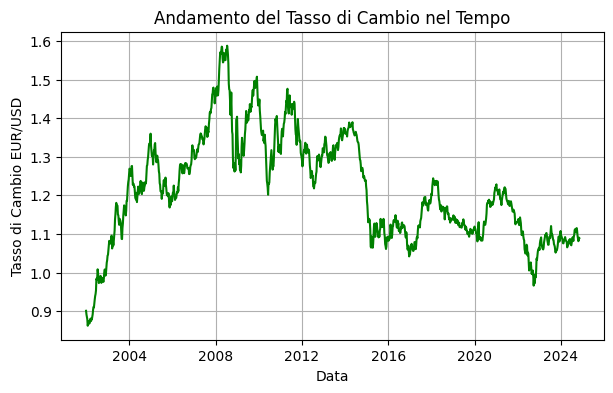

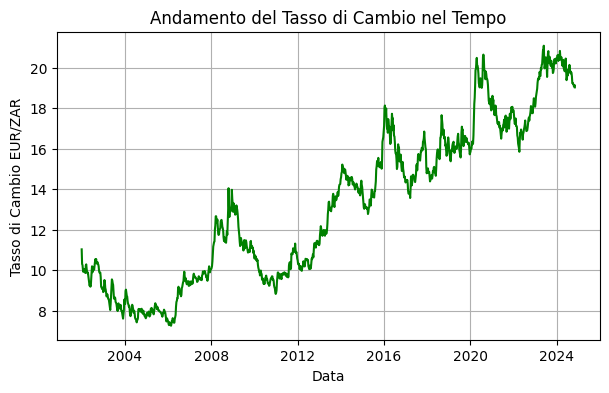

In [28]:
show_temporal_rates_from_all_daraframes(all_df)